In [60]:
from neo4j import GraphDatabase
from CurriculumDB.Modelsn4j import *
import docx
import os
from sklearn.metrics import pairwise_distances
from sklearn.cluster import  AgglomerativeClustering

In [2]:
# URI examples: "neo4j://localhost", "neo4j+s://xxx.databases.neo4j.io"
URI = "bolt://localhost:7687"
AUTH = ("curriculum", "mycurriculum")

driver = GraphDatabase.driver(URI, auth=AUTH)
print(driver)
print(driver.verify_connectivity())
#help(driver.verify_connectivity)
factory = CurriculumFactory(driver, 'curriculumdb')

None


In [3]:
routes = {'BIMS': ["BMS","Biomedical Sciences"],
 'NEUR': ["BMS","Neuroscience"],
 'PHAR': ["BMS","Pharmacology"],
 'PHSC': ["BMS","Physiological Sciences"],
 'BIOLOGSCI': ["BIO","Biological Sciences"],
 'BIOC': ["BIO","Biochemistry"],
 'BSBI' : ["BIO","Biological Sciences (Bioinformatics)"],
 'BSPS': ["BIO","Biological Sciences (Plant Sciences)"],
 'MBIO': ["BIO","Microbiology"],
 'MOLG': ["BIO","Molecular Genetics"],
 'MOLB':["BIO","Molecular Biology"],
 'BCDD' : ["BIO","Biological Chemistry and Drug Discovery"]}

In [6]:
Programme.requiredParams


{'code': 'Programme code', 'name': 'Programme name'}

In [7]:
routeobj ={}
for p in routes:
    prog = factory.get_or_create_Element('Programme', code=p, name=routes[p][1])
    routeobj[p]=prog
    

In [13]:
doc = docx.Document("c:/Users/marti/Documents/LifeSciteaching/Curriculum/Programmes/UG/BSc Hons Biomedical Sciences Programme Specification 2324.docx")



In [111]:
factory = CurriculumFactory(driver, 'curriculumdb')

In [58]:
modmap = []
structure ={}
for t in doc.tables:
    for r in range(len(t.rows)):
        #print(len(t.rows), len(t.row_cells(r)), t.row_cells(r)[0].text,[c.tables for c in t.row_cells(r)])
        structure[t.row_cells(r)[0].text.split()[0]] = t.row_cells(r)
tc=0
for m in structure['2.10'][0].tables:
    coretype=['Core','Elective'][tc%2]
    tc+=1
    for r in range(1,len(m.rows)):
        print([coretype]+[c.text for c in m.row_cells(r)])
        modmap.append([coretype]+[c.text for c in m.row_cells(r)])

['Core', 'BS11009', 'The Building Blocks of Life', '1', '7', '20', 'SLS']
['Core', 'BS11008', 'Core Skills in the Life Sciences 1A', '1', '7', '20', 'SLS']
['Core', 'BS12011', 'Building the Organism', '1', '7', '20', 'SLS']
['Core', 'BS12010', 'Core Skills in the Life Sciences 1B', '1', '7', '20', 'SLS']
['Core', 'BS21001', 'Statistics and Experimental Design', '2', '8', '10', 'SLS']
['Core', 'BS21002', 'Cellular Communication', '2', '8', '10', 'SLS']
['Core', 'BS21012', 'Core Skills in the Life Sciences 2A', '2', '8', '20', 'SLS']
['Core', 'BS22001', 'Human Physiology and Pharmacology', '2', '8', '20', 'SLS']
['Core', 'BS22002', 'Biomolecular Mechanisms', '2', '8', '20', 'SLS']
['Core', 'BS22003', ' Core Skills in the Life Sciences 2B', '2', '8', '20', 'SLS']
['Core', 'BS31013', 'Biomembranes', '3', '9', '15', 'SLS/SoM']
['Core', 'BS31016', 'Practical Techniques in Biomedical Sciences', '3', '9', '15', 'SLS/SoM']
['Core', 'BS31019', 'Regulatory Physiology & Pharmacology', '3', '9', '1

In [37]:
mods = factory.get_all_elements('Module')
modules ={m.params['code']:m for m in mods} 

In [38]:
modules


{'BS11005': Module: [code: BS11005, name: Numeracy, Chemistry and Physics for the Biological and Biomedical Sciences, credits: 20, scqflevel: 7, shelevel: 1, semester: 1] ID: 4:4f947b4e-c5e2-45c5-b439-76aa1c96d891:0,
 'BS11006': Module: [code: BS11006, name: The Poison Pen, credits: 20, scqflevel: 7, shelevel: 1, semester: 1] ID: 4:4f947b4e-c5e2-45c5-b439-76aa1c96d891:1,
 'BS11008': Module: [code: BS11008, name: Core Skills in the Life Sciences 1A, credits: 20, scqflevel: 7, shelevel: 1, semester: 1] ID: 4:4f947b4e-c5e2-45c5-b439-76aa1c96d891:2,
 'BS11009': Module: [code: BS11009, name: The Building Blocks of Life, credits: 20, scqflevel: 7, shelevel: 1, semester: 1] ID: 4:4f947b4e-c5e2-45c5-b439-76aa1c96d891:3,
 'BS12005': Module: [code: BS12005, name: Science and Society, credits: 20, scqflevel: 7, shelevel: 1, semester: 2] ID: 4:4f947b4e-c5e2-45c5-b439-76aa1c96d891:4,
 'BS12008': Module: [code: BS12008, name: Introduction to Scientific Enterprise, credits: 20, scqflevel: 7, shelevel

In [55]:
{s:structure[s][-1].text for s in structure}

{'Applicability': 'From 2023-24',
 'Section': 'Section 7: University management information (to be completed by the University’s Quality and Academic Standards office)',
 'Heading': 'Details',
 '1.1': 'Bachelor of Science (Hons) in Biomedical Sciences',
 '1.2': 'Biomedical Sciences\n(B1) Anatomy, physiology & pathology\n(B2) Pharmacology, toxicology & pharmacy\n(C0) Broadly-based programmes within biological sciences\n(C1) Biology\n(C9) Others in Biological Sciences\n',
 '1.3': 'B900 Biomedical Sciences\nB901 Biomedical Sciences with year in industry\n',
 '1.4': 'University of Dundee',
 '1.5': 'University of Dundee',
 '1.6': 'English',
 '1.7': 'SCQF Level 10',
 '1.8': '',
 '1.9': '\n\n',
 '1.10': '\n',
 '1.11': 'Details of the programme aims, indicative content and intended learning outcomes are provided in the Programme Specification.',
 '1.12': 'Details about the modules undertaken by the students are described in this Programme Specification, section 2.10',
 '1.13': 'The University’

In [8]:
programmes={}

In [40]:
os.listdir(progdir)

['Associate (DA College) Programme Specification QASv2.docx',
 'BSc (Hons) Biomedical Studies Programme Specification QASv1.docx',
 'BSc (Hons) Joint Degree Biological and Biomedical Sciences QASv5.docx',
 'BSc (Hons) Joint Degree Molecular Biosciences QASv2.docx',
 'BSc (Hons) Life Sciences (with Dundee and Angus College).docx',
 'BSc Hons Biologsci Programme Specification QASv3.docx',
 'BSc Hons Biomedical Sciences Programme Specification 2324.docx',
 'BSc Hons Neuroscience Programme Specification QASv8.docx',
 'BSc Hons Pharmacology Programme Specification QASv6.docx',
 'BSc Hons Physiological Sciences Programme Specification QASv6.docx']

In [98]:
for m in modmap:
    if modules.get(m[1].strip('*')):
        programmes['BIMS'].map_module(modules[m[1].strip('*')],m[0]=='Elective', year='23/24')

In [42]:
docs = {
    'BIO':'BSc Hons Biologsci Programme Specification QASv3.docx',
'BIMS': 'BSc Hons Biomedical Sciences Programme Specification 2324.docx',
 'NEUR': 'BSc Hons Neuroscience Programme Specification QASv8.docx',
 'PHAR': 'BSc Hons Pharmacology Programme Specification QASv6.docx',
 'PHYS': 'BSc Hons Physiological Sciences Programme Specification QASv6.docx',
'BIOBIMSNUS':'BSc (Hons) Joint Degree Biological and Biomedical Sciences QASv5.docx',
 'BIOHAN':'BSc (Hons) Joint Degree Molecular Biosciences QASv2.docx'
    
}
    

#progdir='c:/Users/marti/Documents/LifeSciteaching/Curriculum/Programmes/UG/'
progdir ='c:/Users/dmamartin/OneDrive - University of Dundee/Teaching/CurriculumDB/Programmes/UG/'

In [44]:
for route in [ 'BIOHAN']:
    print(os.path.join(progdir,docs[route]))
    doc = docx.Document(os.path.join(progdir,docs[route]))
    modmap = []
    structure ={}
    for t in doc.tables:
        for r in range(len(t.rows)):
            #print(len(t.rows), len(t.row_cells(r)), t.row_cells(r)[0].text,[c.tables for c in t.row_cells(r)])
            structure[t.row_cells(r)[0].text.split()[0]] = t.row_cells(r)
    tc=0
    for m in structure['2.10'][0].tables:
        coretype=['Core','Elective'][tc%2]
        tc+=1
        for r in range(1,len(m.rows)):
            print([coretype]+[c.text for c in m.row_cells(r)])
            modmap.append([coretype]+[c.text for c in m.row_cells(r)])
    programmes[route]=factory.get_or_create_Element('Programme', code=route,name=structure['1.1'][-1].text)
    for m in modmap:
        if modules.get(m[1].strip('*')):
            programmes[route].map_module(modules[m[1].strip('*')],m[0]=='Elective', year='23/24')

c:/Users/dmamartin/OneDrive - University of Dundee/Teaching/CurriculumDB/Programmes/UG/BSc (Hons) Joint Degree Molecular Biosciences QASv2.docx
['Elective', 'CHLS1b', 'Basic practical skills Chemistry, Biology & Medical 1', '1', '7', '10', 'HAN']
['Elective', 'CHLS1c', 'Basic theory Chemistry, Biology & Medical  1', '1', '7', '12', 'HAN']
['Elective', 'CHLS2a', 'Basic Skills 2', '1', '7', '8', 'HAN']
['Elective', 'CHLS2b', 'Basic practical skills Chemistry, Biology & Medical 2', '1', '7', '10', 'HAN']
['Elective', 'LS3K', 'Knowledge of molecular biology and biochemical research of DNA and protein', '1', '7', '10', 'HAN']
['Elective', 'LS3P', 'Practical molecular biology and biochemical research of DNA and protein', '1', '7', '10', 'HAN']
['Elective', 'LS3T', 'Molecular biology and biochemical research of DNA and protein', '1', '7', '10', 'HAN']
['Elective', 'LS4K', 'Knowledge about medical diagnostics', '2', '8', '10', 'HAN']
['Elective', 'LS4P', 'Practical medical diagnostics', '2', '

In [21]:
# Processing biologicals
doc = docx.Document(os.path.join(progdir,docs['BIO']))

In [26]:
tablecount = {'BSBI': (8,'Biological Sciences (Bioinformatics)'),
              'BSPS': (10,'Biological Sciences (Plant Sciences)'),
              'BIOC': (12,'Biochemistry'),
              'BCDD': (14,'Biological Chemistry and Drug Discovery'),
              'MBIO': (16,'Microbiology'),
              'MOLB': (18,'Molecular Biology'),
              'MOLG': (20,'Molecular Genetics')
             }
              # list tables
count=0
for t in doc.tables:
    print(count,len(t.rows), t.row_cells(0)[0].text)
    count+=1

0 1 Applicability
1 17 Section 1: Introductory information about the programme (European Diploma Supplement information)
2 14 Section 2: Programme specification for ‘Biological Sciences’
3 9 Section 3: Responsibilities and contacts
4 11 Section 4: Programme details (information for internal use for programme management and quality assurance)
5 21 Section 5: Admissions, recruitment and student records information
6 2 Section 6: Marketing information
7 5 Section 7: University management information (to be completed by the University’s Quality and Academic Standards office)
8 21 Module code
9 31 Module code
10 21 Module code
11 27 Module code
12 23 Module code
13 24 Module code
14 24 Module code
15 23 Module code
16 21 Module code
17 31 Module code
18 22 Module code
19 25 Module code
20 21 Module code
21 27 Module code


In [36]:
tablelist = [t for t in doc.tables]
for rt in tablecount:
    print(rt, tablecount[rt][0])    
    modmap = []
    structure ={}
    for t in doc.tables:
        for r in range(len(t.rows)):
            #print(len(t.rows), len(t.row_cells(r)), t.row_cells(r)[0].text,[c.tables for c in t.row_cells(r)])
            structure[t.row_cells(r)[0].text.split()[0]] = t.row_cells(r)
    tc=0
    try:
        for m in tablelist[tablecount[rt][0]:tablecount[rt][0]+2]:
            coretype=['Core','Elective'][tc%2]
            tc+=1
            for r in range(1,len(m.rows)):
                print([coretype]+[c.text for c in m.row_cells(r)])
                modmap.append([coretype]+[c.text for c in m.row_cells(r)])
        programmes[rt]=factory.get_or_create_Element('Programme', code=rt,name=structure['1.1'][-1].text.replace('Biological Sciences', tablecount[rt][1]))
        for m in modmap:
            if modules.get(m[1].strip('*')):
                programmes[rt].map_module(modules[m[1].strip('*')],m[0]=='Elective', year='23/24')
    except Exception as e:
        print(r, tablecount.get(r, 'Error'), e)

BSBI 8
['Core', 'BS11009', 'The Building Blocks of Life', '1', '7', '20', 'SLS']
['Core', 'BS11008', 'Core Skills in the Life Sciences 1A', '1', '7', '20', 'SLS']
['Core', 'BS12011', 'Building the Organism', '1', '7', '20', 'SLS']
['Core', 'BS12010', 'Core Skills 1B', '1', '7', '20', 'SLS']
['Core', 'BS21001', 'Statistics and Experimental Design', '2', '8', '10', 'SLS']
['Core', 'BS21002', 'Cellular Communication', '2', '8', '10', 'SLS']
['Core', 'BS21012', 'Core Skills 2A', '2', '8', '20', 'SLS']
['Core', 'BS22001', 'Human Physiology and Pharmacology', '2', '8', '20', 'SLS']
['Core', 'BS22002', 'Biomolecular Mechanisms', '2', '8', '20', 'SLS']
['Core', 'BS22003', ' Core Skills in the Life Sciences 2B\n', '2', '8', '20', 'SLS']
['Core', 'BS31003', 'Molecular Structure and Interactions', '3', '9', '15', 'SLS']
['Core', 'BS31004', 'Biochemistry and Cell Biology', '3', '9', '15', 'SLS']
['Core', 'BS31005', 'Genetics', '3', '9', '15', 'SLS']
['Core', 'BS31006', 'Gene Regulation and Express

['Elective', 'BS32009', 'Immunology', '3', '9', '15', 'SLS']
['Elective', 'BS32010', 'Applied Bioinformatics', '3', '9', '15', 'SLS']
['Elective', 'BS32011', 'Practical Project A', '3', '9', '15', 'SLS']
['Elective', 'BS32030', 'Data and Statistical Analysis', '3', '9', '15', 'SLS']
['Elective', 'BS32031', 'Bioinformatics Research\nSkills I', '3', '9', '15', 'SLS']
['Elective', 'BS32032', 'Science Communication', '3', '9', '15', 'SLS/SOM']
['Elective', 'BS42003', 'Advanced Bioinformatics', '4', '10', '15', 'SLS']
['Elective', 'BS42006', 'Advanced Immunology', '4', '10', '15', 'SLS']
['Elective', 'BS42007', 'Cancer Biology', '4', '10', '15', 'SLS/SOM']
['Elective', 'BS42008', 'Stem Cells in Development and Disease', '4', '10', '15', 'SLS']
['Elective', 'BS42005', 'Advanced Plant Sciences', '4', '10', '15', 'SLS']
['Elective', 'BS42009', 'Advanced Molecular Microbiology', '4', '10', '15', 'SLS']
['Elective', 'BS42012', 'Parasitology', '4', '10', '15', 'SLS']
['Elective', 'BS42027', 'Canc

MOLB 18
['Core', 'BS11009', 'The Building Blocks of Life', '1', '7', '20', 'SLS']
['Core', 'BS11008', 'Core Skills 1A', '1', '7', '20', 'SLS']
['Core', 'BS12011', 'Building the Organism', '1', '7', '20', 'SLS']
['Core', 'BS12010', 'Core Skills 1B', '1', '7', '20', 'SLS']
['Core', 'BS21001', 'Statistics and Experimental Design', '2', '8', '10', 'SLS']
['Core', 'BS21002', 'Cellular Communication', '2', '8', '10', 'SLS']
['Core', 'BS21012', 'Core Skills 2A', '2', '8', '20', 'SLS']
['Core', 'BS22001', 'Human Physiology and Pharmacology', '2', '8', '20', 'SLS']
['Core', 'BS22002', 'Biomolecular Mechanisms', '2', '8', '20', 'SLS']
['Core', 'BS22003', 'Core Skills in the Life Sciences 2B\n', '2', '8', '20', 'SLS']
['Core', 'BS31003', 'Molecular Structure and Interactions', '3', '9', '15', 'SLS']
['Core', 'BS31004', 'Biochemistry and Cell Biology', '3', '9', '15', 'SLS']
['Core', 'BS31005', 'Genetics', '3', '9', '15', 'SLS']
['Core', 'BS31006', 'Gene Regulation and Expression', '3', '9', '15',

In [33]:
tablecount


{'BSBI': (8, 'Biological Sciences (Bioinformatics)'),
 'BSPS': (10, 'Biological Sciences (Plant Sciences)'),
 'BIOC': (12, 'Biochemistry'),
 'BCDD': (14, 'Biological Chemistry and Drug Discovery'),
 'MBIO': (16, 'Microbiology'),
 'MOLB': (18, 'Molecular Biology'),
 'MOLG': (20, 'Molecular Genetics')}

In [48]:
ilos ={}
for d in docs:
    structure={}
    doc = docx.Document(os.path.join(progdir, docs[d]))
    for t in doc.tables:
        for r in range(len(t.rows)):
            #print(len(t.rows), len(t.row_cells(r)), t.row_cells(r)[0].text,[c.tables for c in t.row_cells(r)])
            structure[t.row_cells(r)[0].text.split()[0]] = t.row_cells(r)
    ilos[d]=structure['2.3'][1].text.split('\n')

In [71]:
 iloslong=[(m,i) for m in ilos for i in ilos[m] if i]

def ilocompare(a, b):
    seta = set([ word for word in a[1].split() if len(word)>4])
    setb = set([ word for word in b[1].split() if len(word)>4])
    union =seta.union(setb)
    inter = seta.intersection(setb)
    if not union:
        return 1
    return 1-(len(inter)/len(union))

In [75]:
dm =[]
for y in range(len(iloslong)):
    ymat=[]
    for x in range(len(iloslong)):
        ymat.append(ilocompare(iloslong[x], iloslong[y]))
    dm.append(ymat)

In [ ]:
import random
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [74]:
testdata = [random.random() for x in range(10)]
print(testdata)
dm = pairwise_distances( np.array([[x] for x in testdata]),force_all_finite=False)

[0.23889344947720315, 0.9357893816821635, 0.8379705711457038, 0.5656852079439754, 0.06465353450947131, 0.8472605048745835, 0.16094838466382422, 0.5985149512277658, 0.11053719016897623, 0.7475450084155142]


In [86]:
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster,cut_tree
from scipy.spatial.distance import pdist, squareform

In [82]:
pdm=squareform(dm)
iloh =ward(pdm)

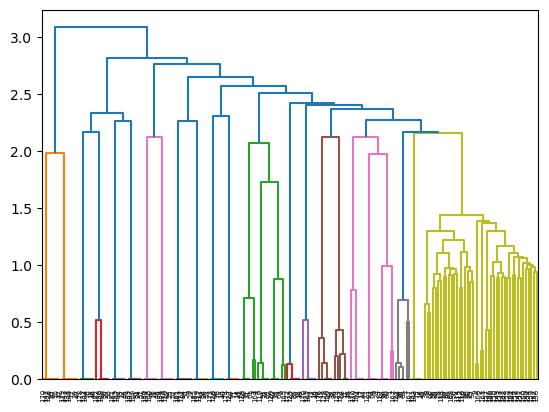

In [87]:
dendrogram(iloh)
plt.show()
clusters=cut_tree(iloh, height=1.0)

In [104]:
for p in range(len(iloslong)):
    #iloslong[p]= list(iloslong[p])+list(clusters[p])
    iloslong[p]= [p]+list(iloslong[p])


In [95]:
groupedterms ={}
for x in iloslong:
    if not groupedterms.get(x[3]):
        groupedterms[x[3]]=[]
    groupedterms[x[3]].append(x)
    

In [99]:
groupedterms[3]

[['BIO',
  'explain the principles that determine the three-dimensional structure of biological macromolecules and give detailed examples of how structure enables function ',
  3],
 ['BIMS',
  'explain the chemistry and structure of the major biological macromolecules and give detailed examples of how structure enables function',
  3],
 ['NEUR',
  'explain the chemistry and structure of the major biological macromolecules and give detailed examples of how structure enables function',
  3],
 ['PHAR',
  'explain the chemistry and structure of the major biological macromolecules and give detailed examples of how structure enables function',
  3],
 ['PHYS',
  'explain the chemistry and structure of the major biological macromolecules and give detailed examples of how structure enables function',
  3],
 ['BIOHAN',
  'Explain the principles that determine the three-dimensional structure of biological macromolecules and give detailed examples of how structure enables function\xa0\xa0',
  3]]

In [106]:
ofh = open('programmeilos.txt','w')
print('Ref','Programme','ILO', 'Cluster',file=ofh, sep='\t')
for i in iloslong:
    print('\t'.join([str(x).replace('\t',' ') for x in i]), file=ofh )
ofh.close()

In [102]:
iloslong[22]

['BIO',
 '•\tProblem solving, including the ability to think and conceptualise analytically, critically, creatively and laterally',
 22]